In [1]:
import sys
from __future__ import print_function, division
import numpy as np # manipulate data
import matplotlib.pyplot as plt # plotting
import scikits.audiolab as al # play sounds, only for python 2
from scipy import signal # window signal
import ipywidgets as widgets # interactive buttons
import matplotlib # plotting parameters
matplotlib.rcParams.update({'font.size': 18}) # enlarge font size
import matplotlib

In [2]:
import pyano

In [3]:
matplotlib.rcParams.update({'font.size': 16})

# How would a world without logarithms look like? 

Author: Florencia Noriega, florencia.noriega@code.berlin

Here we listen to this world exploring the linear piano. 

## The linear piano

The linear piano is a deformation of the normal piano for beings who perceive sound frequencies linearly instead of logarithmically as we humans do. 
To understand the linear piano deformation, let's first look at how the normal piano works. 


### The piano

The piano (or any keyboard) is composed of black an white keys that map to the 12 notes of the [chromatic scale](https://en.wikipedia.org/wiki/Chromatic_scale).
Every 12 notes we go back to the same note one octave higher.  The frequency of a note doubles from one octave to the next octave. For example, the frequency of A in the 3rd octave is 220 Hz and in the 4th octave is 440 Hz.

In the figure below the keys are grouped into nine octaves.
We can label the keys of the piano by their position $n$; one for the first key, two for the second and so on. 
With such labelling, note C of the 4th octave, or C4, would be the 40th key of the piano and note A4 (A in the 4th octave) would be the 49th key.

<a title="AlwaysAngry [CC BY-SA 3.0 (https://creativecommons.org/licenses/by-sa/3.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Piano_Frequencies.svg"><img width="700" alt="Piano Frequencies" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Piano_Frequencies.svg/512px-Piano_Frequencies.svg.png"></a>

The fundamental frequency of the $n$ key, $f(n)$, is given by the equation

$$
f(n) = \left(\sqrt[12]{2}\,\right)^{n-49} \times 440 \,\text{Hz}.
$$


https://en.wikipedia.org/wiki/Piano_key_frequencies 




In [11]:
N_keys = 12 * 7 + 3 + 1
print('There are', N_keys, 'the keyboard')

There are 88 the keyboard


The frequencies of the notes follow an exponential relation. 
This means that the interval between consecutive notes is not constant increases exponenitialy.

Text(0,0.5,'Frequency (Hz)')

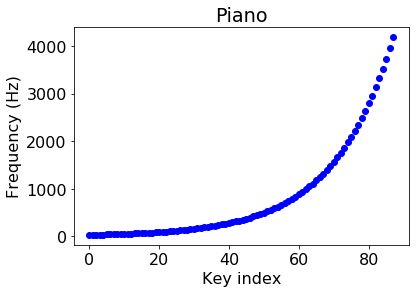

In [12]:
Mk = pyano.keys2frequencies(np.arange(1, N_keys+1))

#plt.semilogy(Mk, 'bo')
plt.plot(Mk, 'bo')
plt.title('Piano')
plt.xlabel('Key index')
plt.ylabel('Frequency (Hz)')

If the intervals between consecutive notes didn't change, ie. the relation between the notes and the fundamental frequency was linear, the piano would completely different.

Text(0,0.5,'Frequency (Hz)')

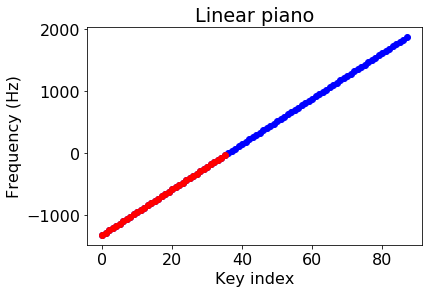

In [13]:
fr = pyano.linear_piano_key2frequency(np.arange(1, N_keys+1))

plt.plot(fr, 'bo')
plt.plot(fr[fr<0], 'ro')

plt.title('Linear piano')
plt.xlabel('Key index')
plt.ylabel('Frequency (Hz)')

The linear piano misses almost half of the notes

In [14]:
np.argwhere(fr>0)[0:2]

array([[37],
       [38]])

### First five keys of the piano


In [16]:
## piano
piano_keys = [str(item) for item in pyano.round2int(pyano.keys2frequencies(np.arange(1,6)))]

## lienear piano
valid_linear_piano_keys = np.array( [item[0] for item in np.argwhere(fr>0)]) # keep only notes with positive frequency

linearPiano_keys = [str(item) for 
                    item in pyano.round2int(pyano.linear_piano_keys2frequencies(valid_linear_piano_keys[np.arange(5)]))]
print("Frequencies of the first keys\nPiano", piano_keys)
print("Linear piano", linearPiano_keys)

Frequencies of the first keys
Piano ['28', '29', '31', '33', '35']
Linear piano ['0', '37', '73', '110', '147']


Let's listen at them

First five, are the notes of the piano and last five are the first five notes of the linear piano.

In [17]:
buttons = widgets.ToggleButtons(
    options=piano_keys + linearPiano_keys,
    description='Frequency:',
)
    
def on_click(change):
    pyano.playwave(float(change['new']))
    
buttons.observe(on_click, 'value')
buttons

VG9nZ2xlQnV0dG9ucyhkZXNjcmlwdGlvbj11J0ZyZXF1ZW5jeTonLCBvcHRpb25zPSgnMjgnLCAnMjknLCAnMzEnLCAnMzMnLCAnMzUnLCAnMCcsICczNycsICc3MycsICcxMTAnLCAnMTQ3JynigKY=


# Play some notes

In [21]:
buttons = widgets.ToggleButtons(
    options=['22', '31', '80', '110','220', '440', '880', '390' ],
    description='Frequency:',
)
    
def on_click(change):
    pyano.playwave(float(change['new']))
    

buttons.observe(on_click, 'value')
buttons

VG9nZ2xlQnV0dG9ucyhkZXNjcmlwdGlvbj11J0ZyZXF1ZW5jeTonLCBvcHRpb25zPSgnMjInLCAnMzEnLCAnODAnLCAnMTEwJywgJzIyMCcsICc0NDAnLCAnODgwJywgJzM5MCcpLCB2YWx1ZT3igKY=


# Major scale

In [26]:
majorScale = [str(item) for item in pyano.round2int(pyano.majorScaleFreqs(n0=40))]

buttons = widgets.ToggleButtons(
    options=majorScale,
    description='Frequency:',
)
    
def on_click(change):
    pyano.playwave(float(change['new']))
    

buttons.observe(on_click, 'value')
buttons

VG9nZ2xlQnV0dG9ucyhkZXNjcmlwdGlvbj11J0ZyZXF1ZW5jeTonLCBvcHRpb25zPSgnMjYyJywgJzI5NCcsICczMzAnLCAnMzQ5JywgJzM5MicsICc0NDAnLCAnNDk0JywgJzUyMycpLCB2YWzigKY=


## Major scale in a world without logarithms

In [29]:
linear_majorScale = [str(item) for item in pyano.round2int(pyano.linear_majorScaleFreqs(n0=40))]

buttons = widgets.ToggleButtons(
    options = pyano.linear_majorScaleFreqs(), #['440', '494', '523', '587', '659', '698', '784', '880'],
    description='Frequency:',
)
    
def on_click(change):
    pyano.playwave(float(change['new']))
    

buttons.observe(on_click, 'value')
buttons

VG9nZ2xlQnV0dG9ucyhkZXNjcmlwdGlvbj11J0ZyZXF1ZW5jeTonLCBvcHRpb25zPSg0NDAuMCwgNTEzLjMzMzMzMzMzMzMzMzMsIDU4Ni42NjY2NjY2NjY2NjY3LCA2MjMuMzMzMzMzMzMzMzPigKY=


# Play all keys

In [33]:
fs=44000
t = pyano.time_arr(0.5, fs)

for n in np.arange(35,60):
    f = pyano.key2frequency(n)
    print("key {}, frequency {:.1f} Hz".format(n, f))
    y = pyano.sinewave(f, t)
    al.play(y, fs=fs)


key 35, frequency 196.0 Hz
key 36, frequency 207.7 Hz
key 37, frequency 220.0 Hz
key 38, frequency 233.1 Hz
key 39, frequency 246.9 Hz
key 40, frequency 261.6 Hz
key 41, frequency 277.2 Hz
key 42, frequency 293.7 Hz
key 43, frequency 311.1 Hz
key 44, frequency 329.6 Hz
key 45, frequency 349.2 Hz
key 46, frequency 370.0 Hz
key 47, frequency 392.0 Hz
key 48, frequency 415.3 Hz
key 49, frequency 440.0 Hz
key 50, frequency 466.2 Hz
key 51, frequency 493.9 Hz
key 52, frequency 523.3 Hz
key 53, frequency 554.4 Hz
key 54, frequency 587.3 Hz
key 55, frequency 622.3 Hz
key 56, frequency 659.3 Hz
key 57, frequency 698.5 Hz
key 58, frequency 740.0 Hz
key 59, frequency 784.0 Hz


In [35]:
t = pyano.time_arr(0.5, fs)

for n in np.arange(35,60):
    f = pyano.linear_piano_key2frequency(n)
    print("key {}, frequency {:.1f} Hz".format(n, f))
    y = pyano.sinewave(f, t)
    al.play(y, fs=fs)

key 35, frequency -73.3 Hz
key 36, frequency -36.7 Hz
key 37, frequency 0.0 Hz
key 38, frequency 36.7 Hz
key 39, frequency 73.3 Hz
key 40, frequency 110.0 Hz
key 41, frequency 146.7 Hz
key 42, frequency 183.3 Hz
key 43, frequency 220.0 Hz
key 44, frequency 256.7 Hz
key 45, frequency 293.3 Hz
key 46, frequency 330.0 Hz
key 47, frequency 366.7 Hz
key 48, frequency 403.3 Hz
key 49, frequency 440.0 Hz
key 50, frequency 476.7 Hz
key 51, frequency 513.3 Hz
key 52, frequency 550.0 Hz
key 53, frequency 586.7 Hz
key 54, frequency 623.3 Hz
key 55, frequency 660.0 Hz
key 56, frequency 696.7 Hz
key 57, frequency 733.3 Hz
key 58, frequency 770.0 Hz
key 59, frequency 806.7 Hz


## Let's play Beethoven's Symphony No. 9 "Ode to Joy"

In [36]:
ode = list('BBCDDCBAGG' # G A and B should be an octave below
           'ABBAA'\
          'BBCDD'\
          'CBAGG'\
          'ABAGG'\
          'ABGA'\
          'BCBGA'\
          'BCBAG'\
          'ADD'\
          'BBCDD'\
           'CBAGG'\
           'ABAGG'
           )

In [39]:
for note in ode:
    n = pyano.note2pianokey(note, octave=3) # get key from note name
    f = pyano.key2frequency(n) # get frequency if the note
    print("Piano key {}, frequency {:.1f} Hz".format(note, f))
    y = pyano.harmonic(f, t)
    al.play(y, fs=fs)

Piano key B, frequency 246.9 Hz
Piano key B, frequency 246.9 Hz
Piano key C, frequency 130.8 Hz
Piano key D, frequency 146.8 Hz
Piano key D, frequency 146.8 Hz
Piano key C, frequency 130.8 Hz
Piano key B, frequency 246.9 Hz
Piano key A, frequency 220.0 Hz
Piano key G, frequency 196.0 Hz
Piano key G, frequency 196.0 Hz
Piano key A, frequency 220.0 Hz
Piano key B, frequency 246.9 Hz
Piano key B, frequency 246.9 Hz
Piano key A, frequency 220.0 Hz
Piano key A, frequency 220.0 Hz
Piano key B, frequency 246.9 Hz
Piano key B, frequency 246.9 Hz
Piano key C, frequency 130.8 Hz
Piano key D, frequency 146.8 Hz
Piano key D, frequency 146.8 Hz
Piano key C, frequency 130.8 Hz
Piano key B, frequency 246.9 Hz
Piano key A, frequency 220.0 Hz
Piano key G, frequency 196.0 Hz
Piano key G, frequency 196.0 Hz
Piano key A, frequency 220.0 Hz
Piano key B, frequency 246.9 Hz
Piano key A, frequency 220.0 Hz
Piano key G, frequency 196.0 Hz
Piano key G, frequency 196.0 Hz
Piano key A, frequency 220.0 Hz
Piano ke

### Now with the linear piano

In [38]:
for note in ode:
    n = pyano.note2pianokey(note, octave=4)
    f = pyano.key2frequency(n)
    fl = pyano.linear_piano_key2frequency(n)
    print("Piano key {} ({:.1f}), frequency {:.1f} Hz".format(note, f, fl))
    y = pyano.harmonic(fl, t)
    al.play(y, fs=fs)

Piano key B (493.9), frequency 513.3 Hz
Piano key B (493.9), frequency 513.3 Hz
Piano key C (261.6), frequency 110.0 Hz
Piano key D (293.7), frequency 183.3 Hz
Piano key D (293.7), frequency 183.3 Hz
Piano key C (261.6), frequency 110.0 Hz
Piano key B (493.9), frequency 513.3 Hz
Piano key A (440.0), frequency 440.0 Hz
Piano key G (392.0), frequency 366.7 Hz
Piano key G (392.0), frequency 366.7 Hz
Piano key A (440.0), frequency 440.0 Hz
Piano key B (493.9), frequency 513.3 Hz
Piano key B (493.9), frequency 513.3 Hz
Piano key A (440.0), frequency 440.0 Hz
Piano key A (440.0), frequency 440.0 Hz
Piano key B (493.9), frequency 513.3 Hz
Piano key B (493.9), frequency 513.3 Hz
Piano key C (261.6), frequency 110.0 Hz
Piano key D (293.7), frequency 183.3 Hz
Piano key D (293.7), frequency 183.3 Hz
Piano key C (261.6), frequency 110.0 Hz
Piano key B (493.9), frequency 513.3 Hz
Piano key A (440.0), frequency 440.0 Hz
Piano key G (392.0), frequency 366.7 Hz
Piano key G (392.0), frequency 366.7 Hz
